Kodları tam olarak bölüm bölüm ayıramadım. Çümkü kodların böyle keskin çizgilerle nasıl ayrılacağını bilemiyorum. Bir data cleaning yaparken mesela EDA başlığı altında kullanacağım bir görselleştirme kodu yazabiliyorum.

In [1]:
#Kütüphanelerin yüklenmesi(modellerle alakalı modülleri kullandığım zamanda import ettim keras gibi.)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Bu kodu çoğu notebook da görüyorum uyarıların düzenlenmesi ile alakalı
import warnings
warnings.filterwarnings("ignore")

In [2]:
veri = pd.read_csv('heart.csv')
veri.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
#Kullanılmamış olarak gözüküyor ama bu import işlemini yapmassam profile_report kullanamıyorum.
#Profile_report işi EDA için bana çok mantıklı geliyor o yüzden hep kullanıyorum.
import ydata_profiling
veri.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
veri.shape

(303, 14)

In [6]:
#1 kopya veri var onu düzeltiyorum.
duplica = veri[veri.duplicated()]
print(duplica)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [7]:
veri.drop_duplicates(inplace=True)
veri.shape

(302, 14)

In [8]:
veri.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
#Veriler üzerinde işlem yapmak üzere kategorik ve sürekli veri olarak ayırıyorum.
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
cat_cols = ["sex", "exng", "caa", "cp", "fbs", "restecg", "slp", "thall"]
target_col = ["output"]

veri[con_cols].describe().transpose()

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
trtbps    302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
thalachh  302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2

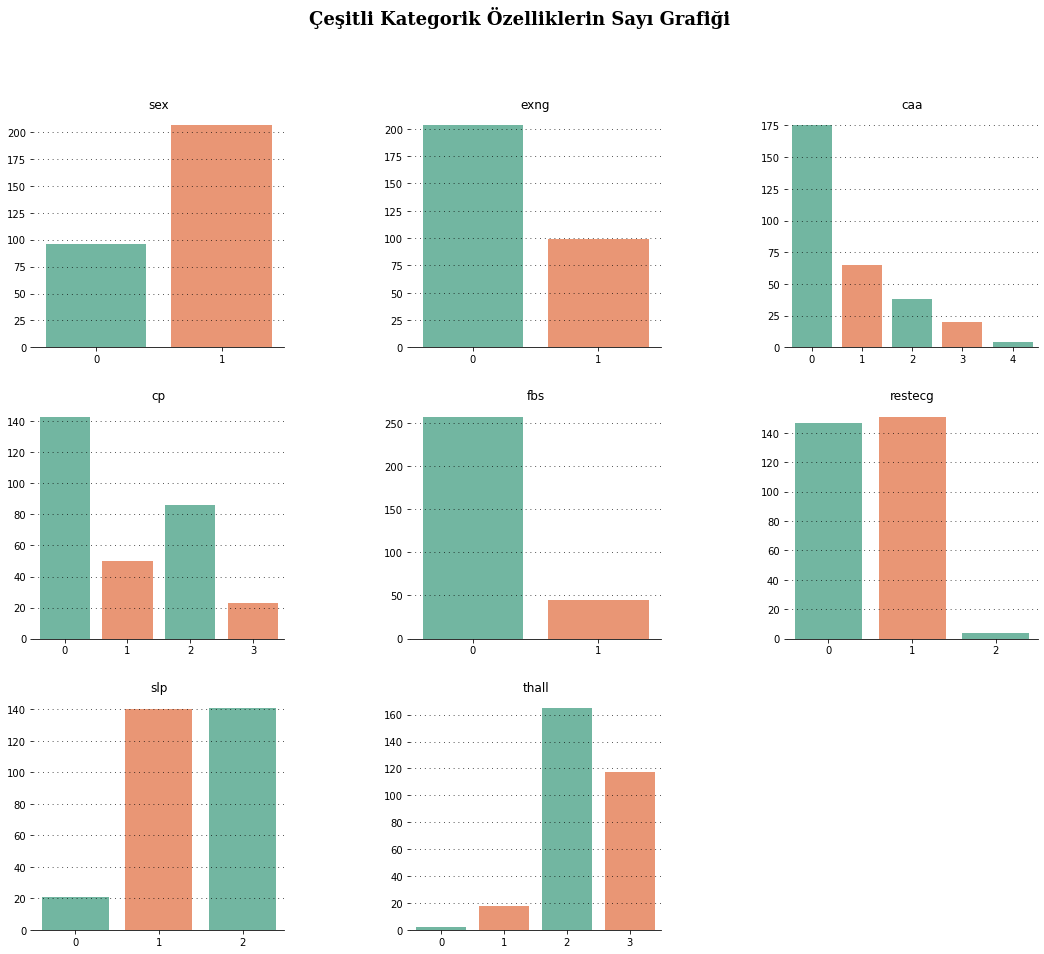

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.25)

for i, feature in enumerate(veri[cat_cols]):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    sns.countplot(data=veri, x=feature, palette=["#66c2a5", "#fc8d62"], ax=ax)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(feature)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
if i < 8:
    axs[row, col + 1].axis('off')

plt.suptitle("Çeşitli Kategorik Özelliklerin Sayı Grafiği", fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()

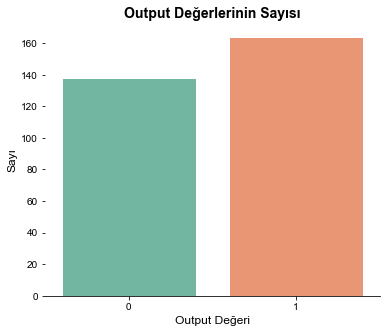

In [11]:
# Alt grafiklerin oluşturulması
fig, ax = plt.subplots(figsize=(6, 5))

# Renk paleti ve tema ayarları
sns.set_palette("pastel")  
sns.set_theme(style="whitegrid")

sns.countplot(data=veri, x='output', palette=["#66c2a5", "#fc8d62"], ax=ax)

# Eksen ayarları
ax.set_xlabel("Output Değeri", fontsize=12)
ax.set_ylabel("Sayı", fontsize=12)
ax.set_title("Output Değerlerinin Sayısı", fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)

# Gereksiz çerçeve çizgilerini gizleme
for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)

plt.show()

In [12]:
veri_corr = veri[con_cols].corr().transpose()
veri_corr

age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.283121  0.207216 -0.395235  0.206040
trtbps    0.283121  1.000000  0.125256 -0.048023  0.194600
chol      0.207216  0.125256  1.000000 -0.005308  0.050086
thalachh -0.395235 -0.048023 -0.005308  1.000000 -0.342201
oldpeak   0.206040  0.194600  0.050086 -0.342201  1.000000

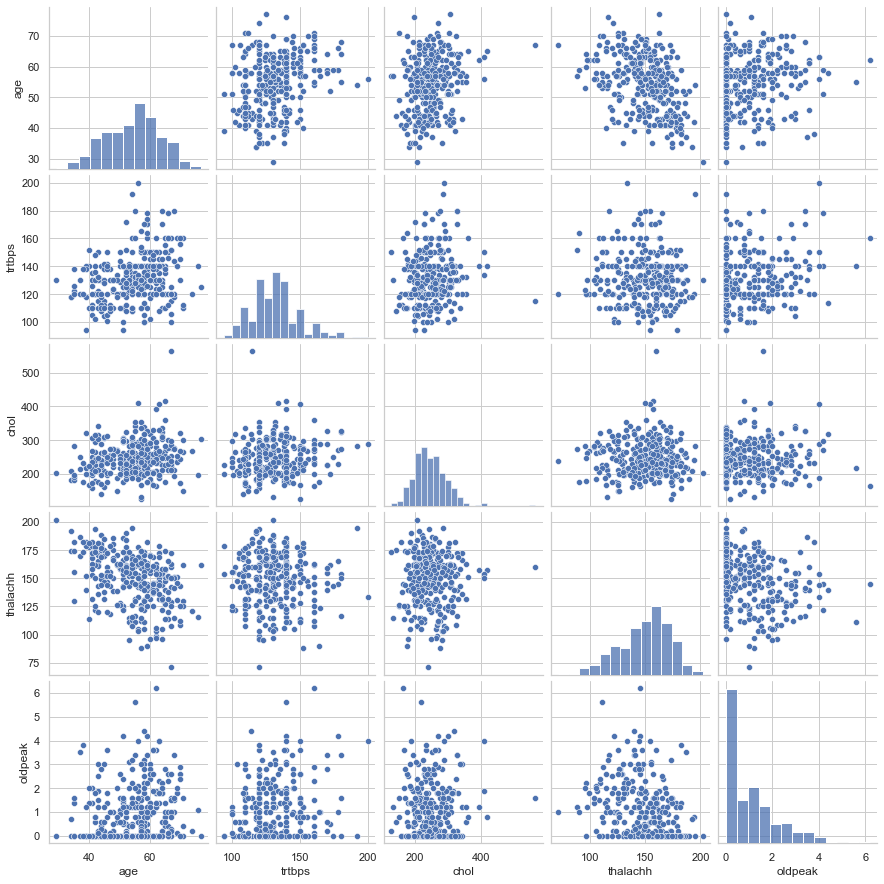

In [13]:
sns.pairplot(data = veri[con_cols])

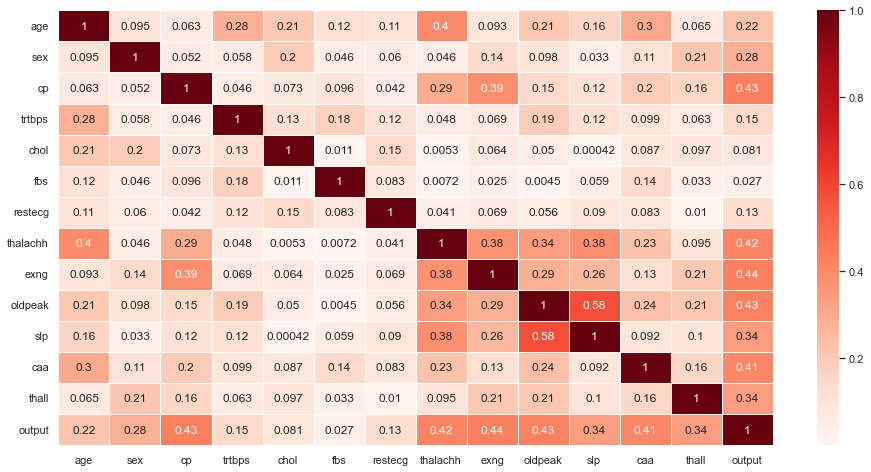

exng        0.435601
cp          0.432080
oldpeak     0.429146
thalachh    0.419955
caa         0.408992
slp         0.343940
thall       0.343101
sex         0.283609
age         0.221476
trtbps      0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: output, dtype: float64


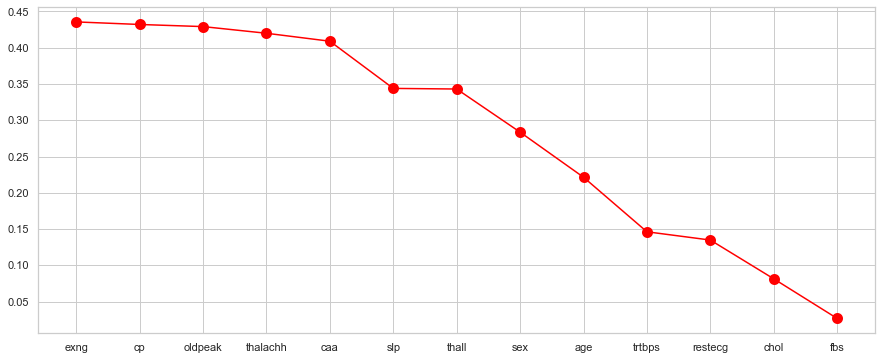

In [14]:
#Korelasyon haritası
plt.figure(figsize=(16,8))
corr=veri.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

#Output değeri ile featurelerin korelasyonu
C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

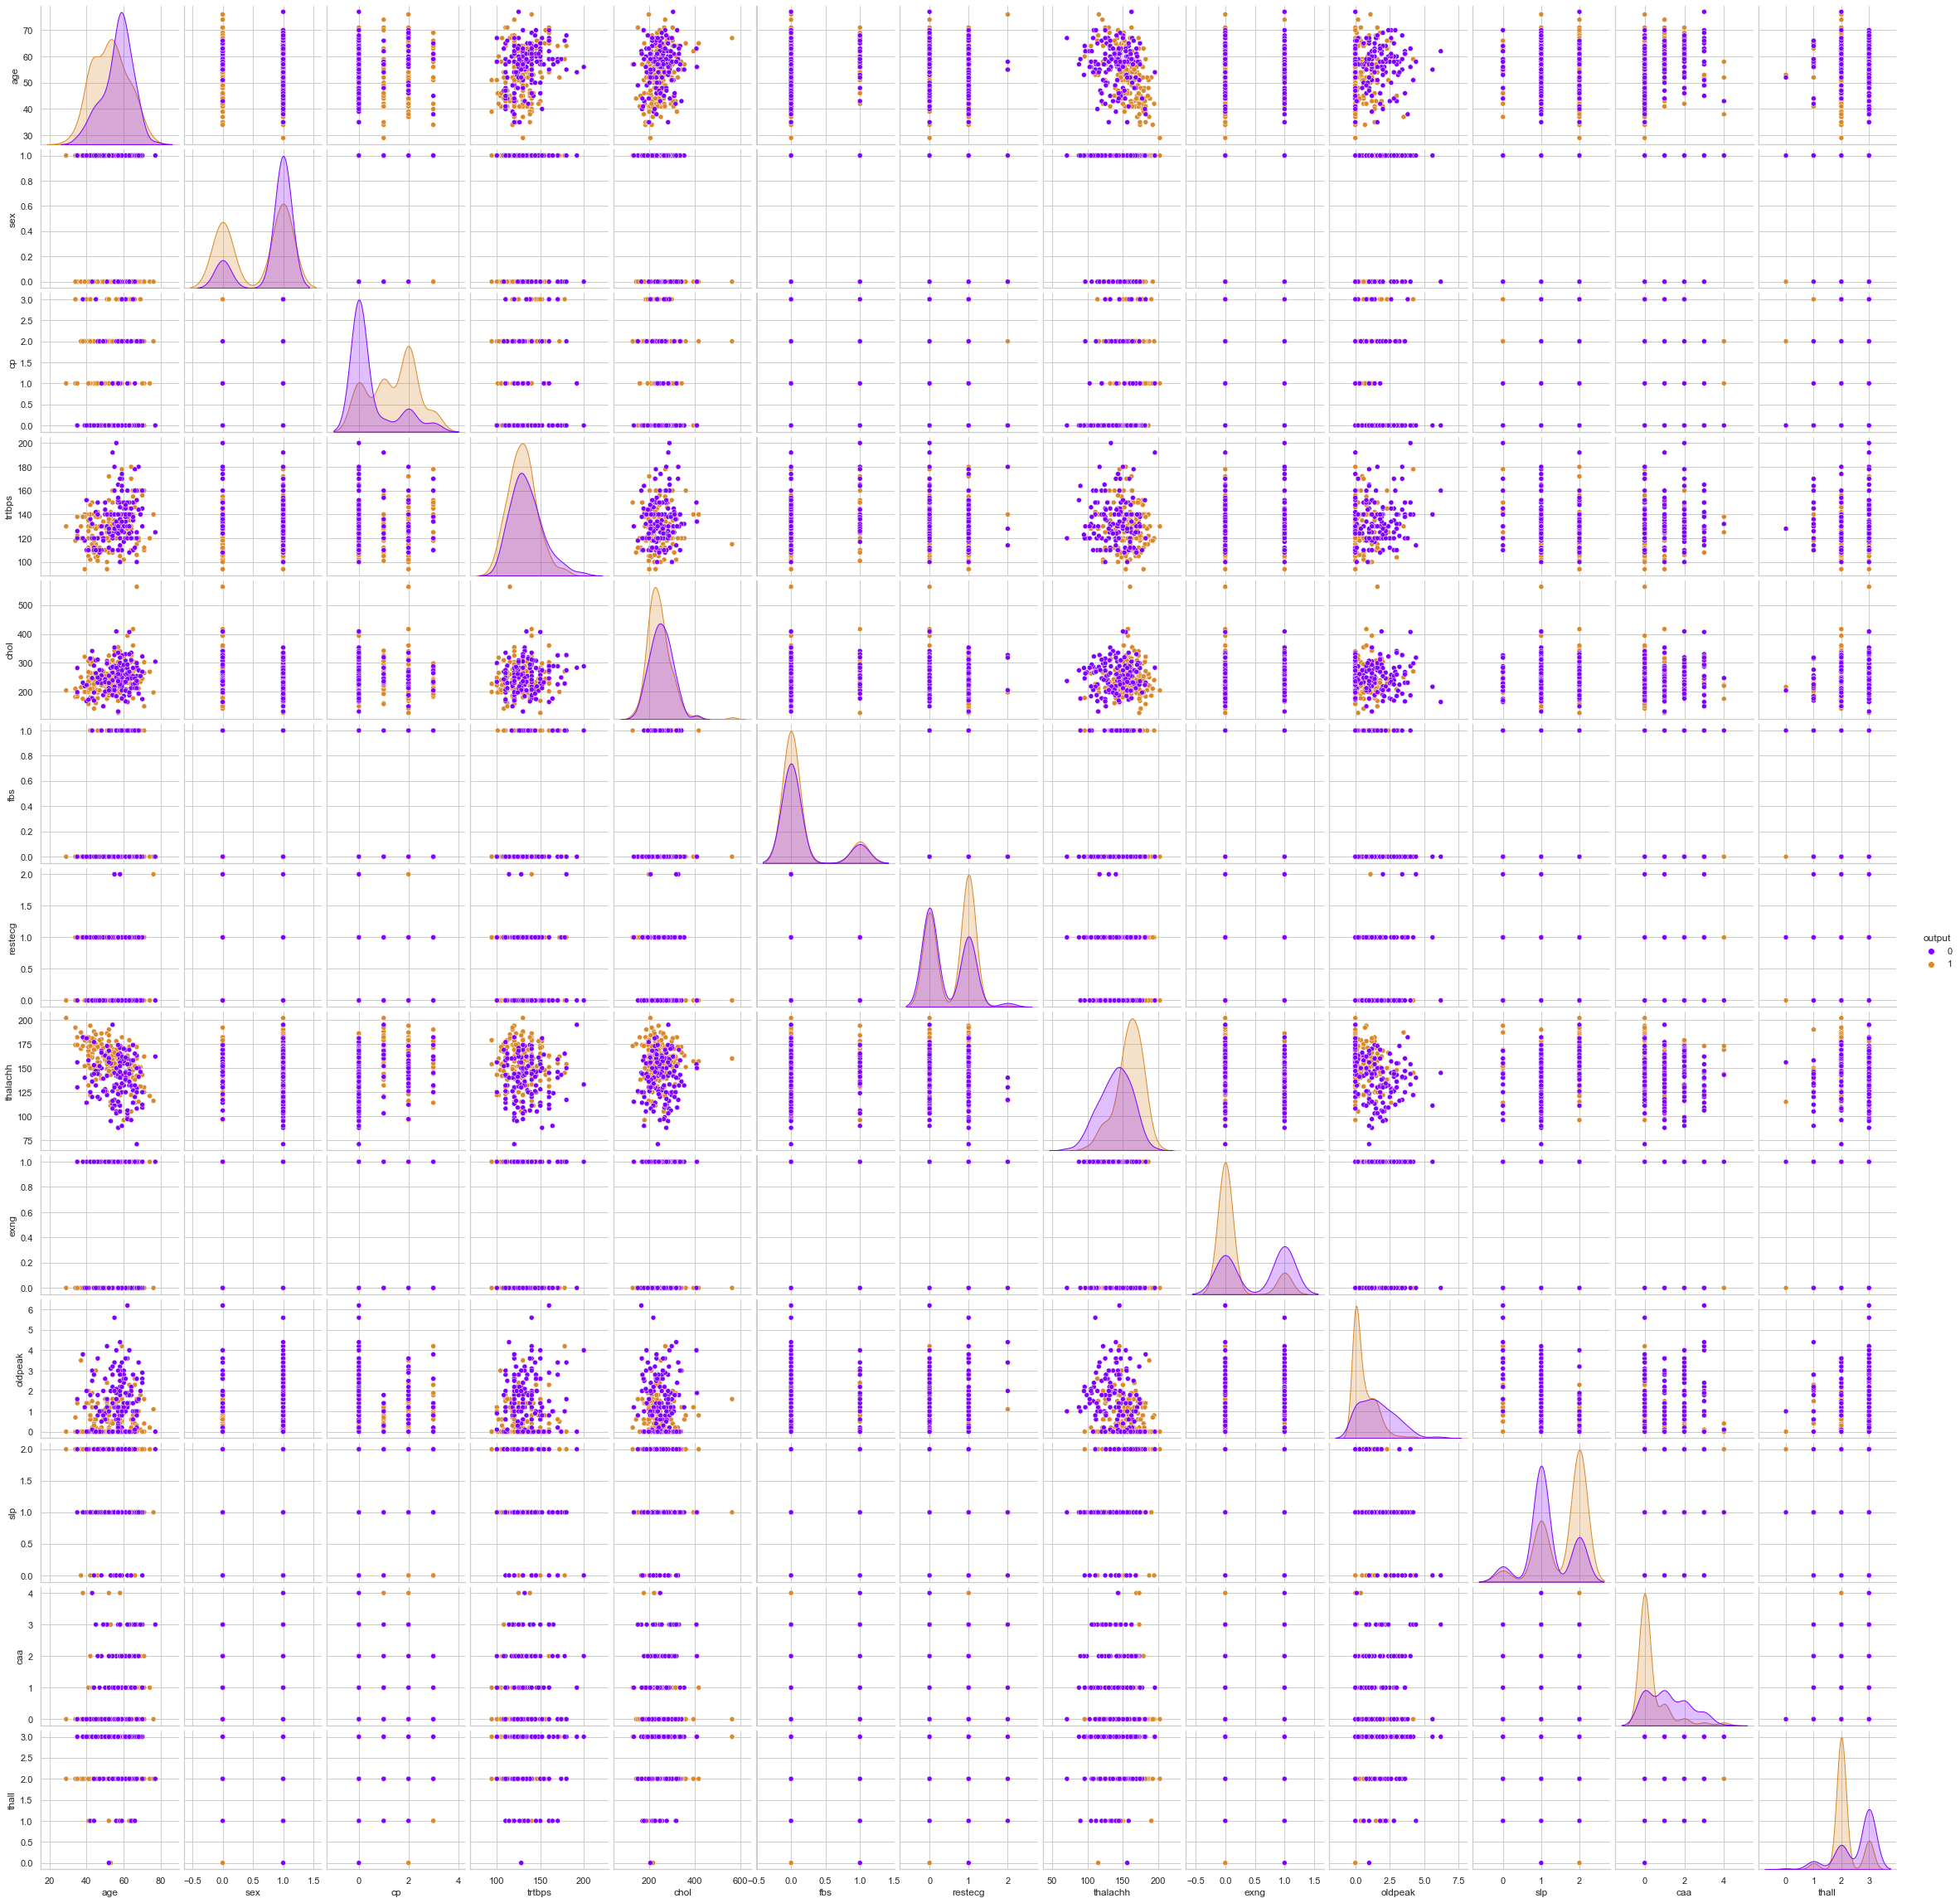

In [15]:
#Yine output ile featurelerin pairplotla görselleştirilmesi
sns.pairplot(veri,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

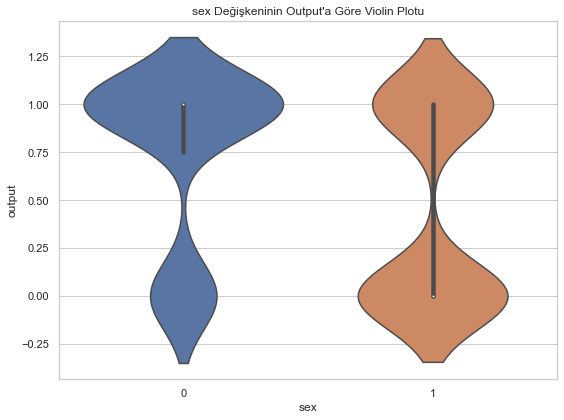

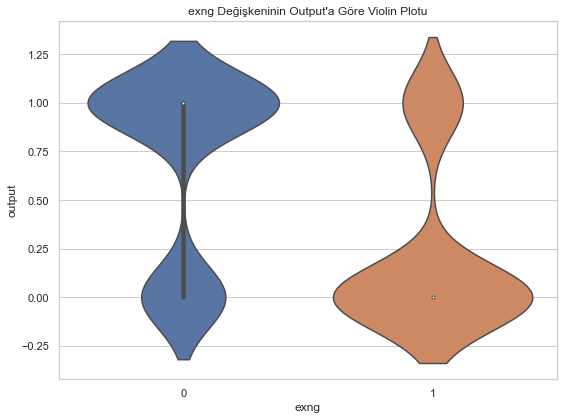

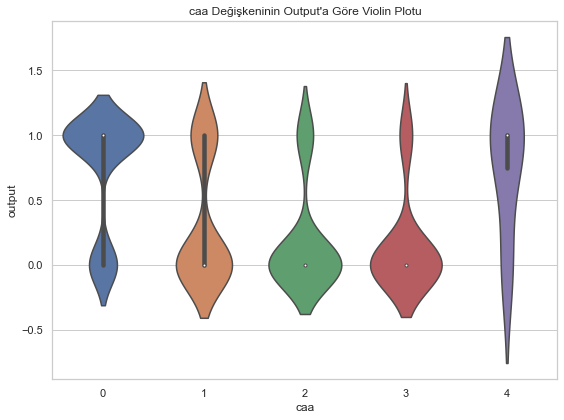

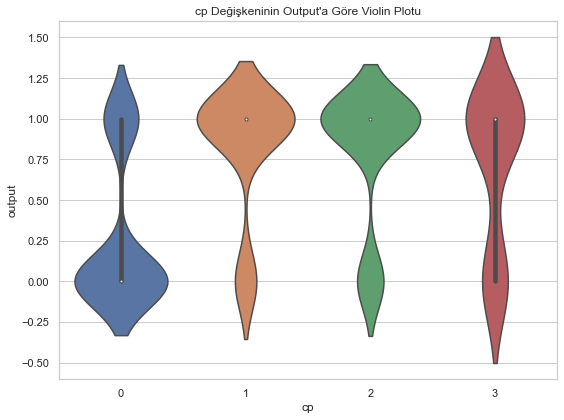

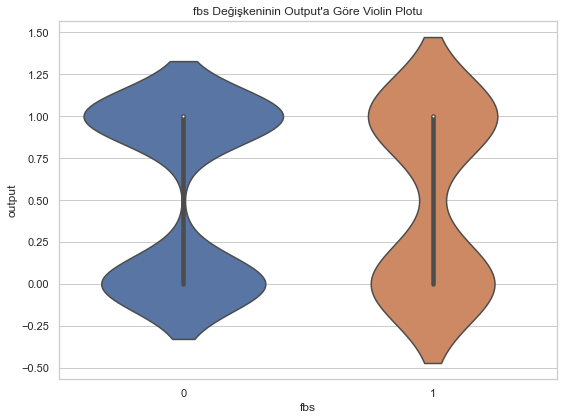

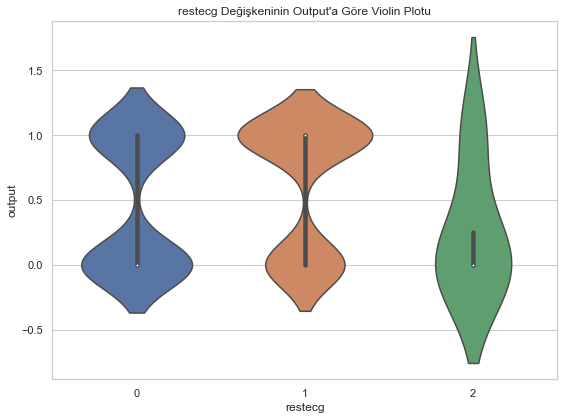

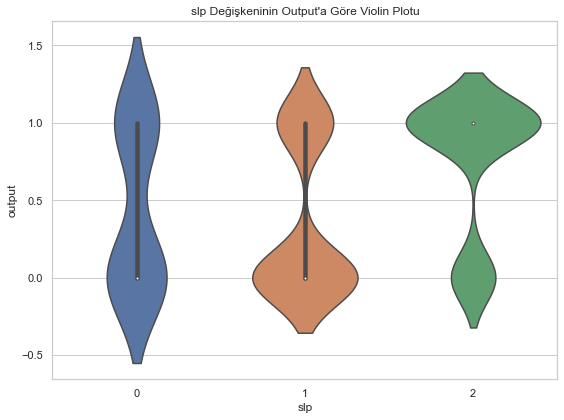

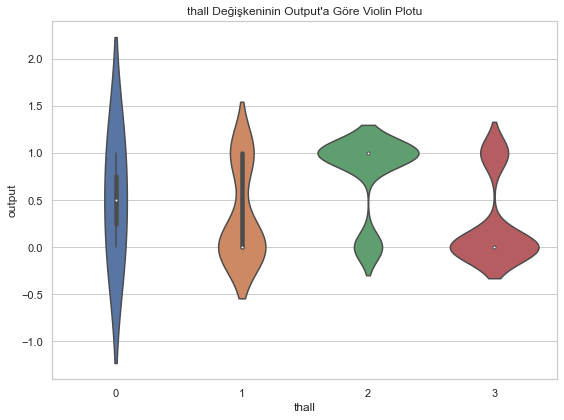

In [16]:
#Violin plotunun farkı yoğunlukla beraber barplotun birleştirilmesi
for feature in cat_cols:
    plt.figure(figsize=(8, 6)) 
    sns.violinplot(x=feature, y="output", data=veri)
    plt.title(f"{feature} Değişkeninin Output'a Göre Violin Plotu")
    plt.tight_layout()
    plt.show()

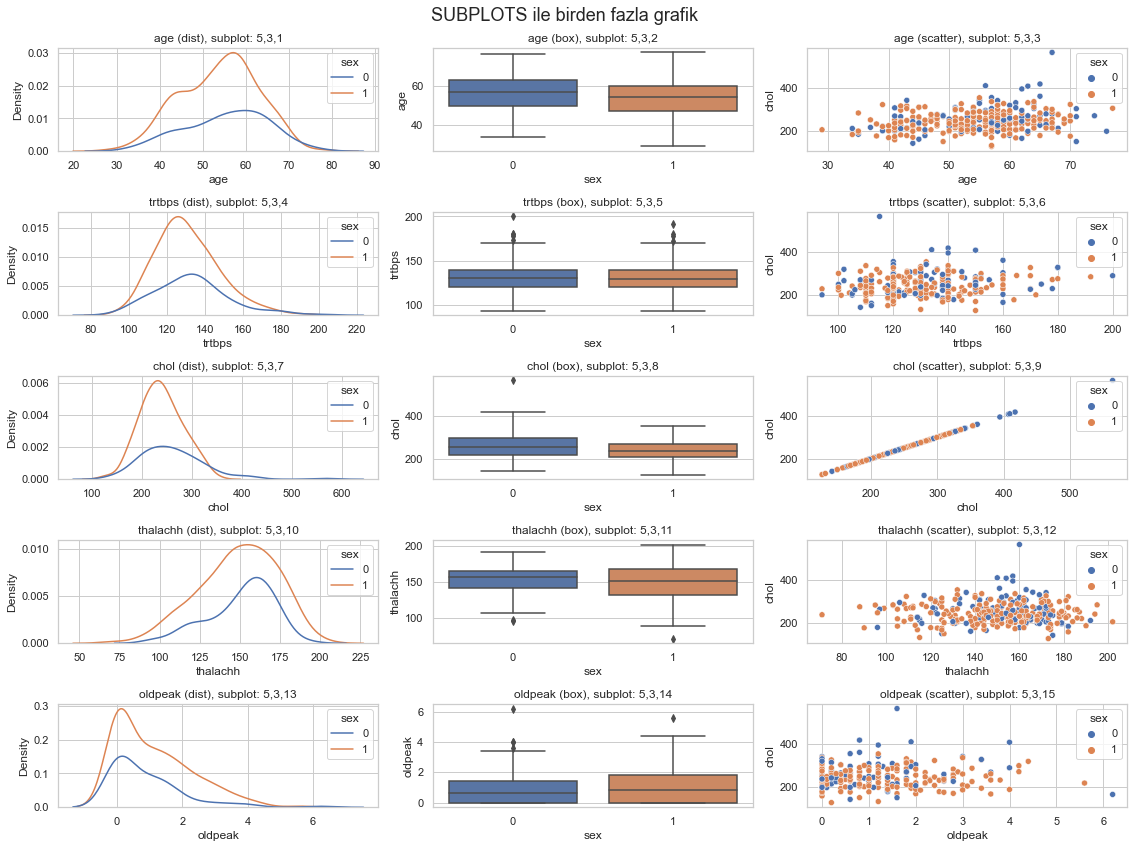

In [17]:
#Bu kodu kaggle da bir notebookda gördüm. 3 grafik türünü aynanda uyguluyor.
a = len(con_cols)  
b = 3 
c = 1  

fig = plt.figure(figsize = (16, 12))
plt.suptitle("SUBPLOTS ile birden fazla grafik", fontsize = 18)

for i in con_cols:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(data = veri, x = i, hue ='sex')
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = veri, y = i, x = 'sex')
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = veri, x = i, y = 'chol', hue = 'sex')
    c = c + 1

plt.tight_layout()
plt.show()

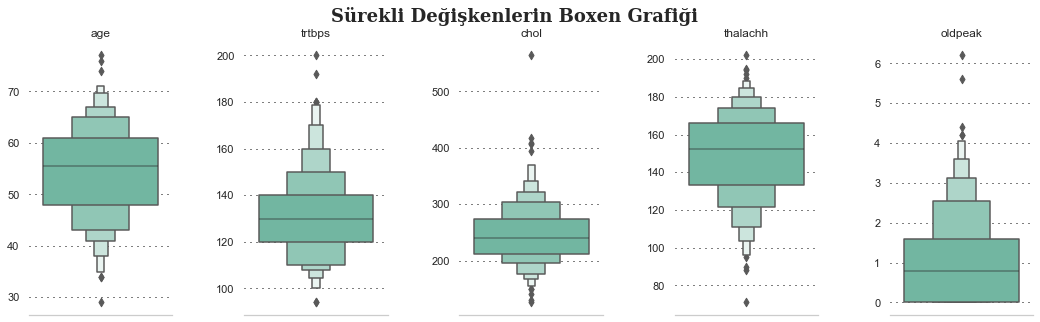

In [18]:
#Boxplot ile outliers inceleme
fig, axs = plt.subplots(1, 5, figsize=(18, 5))
fig.subplots_adjust(wspace=0.5)


for i, feature in enumerate(con_cols):
    ax = axs[i]
    
    sns.boxenplot(data=veri, y=feature, ax=ax, palette=["#66c2a5", "#fc8d62"])
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(feature)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.suptitle("Sürekli Değişkenlerin Boxen Grafiği", fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()

In [19]:
#Bunu da notebookda gördüm. IQR değeri hesaplanıp 1.5 kat daha yüksek veya daha düşük değerler filtrelenir.
#v_col değişkenine aktarılır. Aykırı değerlerin sayısı ve yüzdesi hesaplanıp yazdırılır.
for k, v in veri[con_cols].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(veri)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column thalachh outliers = 1 => 0.331%
Column oldpeak outliers = 8 => 2.649%


In [20]:
#Aykırı değerlerle başa çıkmak için log transform kullanımı ve tekrar aykırı değerlerin hesaplanması
veri["age"]= np.log(veri.age)
veri["trtbps"]= np.log(veri.trtbps)
veri["chol"]= np.log(veri.chol)
veri["thalachh"]= np.log(veri.thalachh)
print("---Log Transform performed---")

for k, v in veri[con_cols].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(veri)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 1 => 0.331%
Column trtbps outliers = 9 => 2.98%
Column chol outliers = 6 => 1.987%
Column thalachh outliers = 4 => 1.325%
Column oldpeak outliers = 8 => 2.649%


In [21]:
from sklearn.model_selection import train_test_split

X = veri.drop(columns=['output'])
y = veri['output']

# Korelasyon matrisini hesaplama
korelasyon_matrisi = veri.corr()

# Korelasyon matrisini hedef değişken ile sıralama
korelasyon_sirali = korelasyon_matrisi['output'].abs().sort_values(ascending=False)

# Belirli bir eşik değeri üzerindeki özellikleri seçme
eşik_değer = 0.2  
seçilen_özellikler = korelasyon_sirali[korelasyon_sirali >= eşik_değer].index.tolist()
seçilen_özellikler.remove('output')
# Seçilen özellikleri içeren veriyi oluşturma
X_seçilen = X[seçilen_özellikler]

# Veriyi eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_seçilen, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

threshold = 0.5
y_pred_class = [1 if y >= threshold else 0 for y in y_pred]

accuracy1 = accuracy_score(y_test, y_pred_class)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Accuracy: {accuracy1:.2f}")
print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R-kare (R2): {r2:.2f}")

Accuracy: 0.85
Ortalama Kare Hata (MSE): 0.11
Kök Ortalama Kare Hata (RMSE): 0.34
Ortalama Mutlak Hata (MAE): 0.26
R-kare (R2): 0.54


In [23]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

threshold = 0.5
y_pred_class = [1 if y >= threshold else 0 for y in y_pred]

accuracy2 = accuracy_score(y_test, y_pred_class)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Accuracy: {accuracy2:.2f}")
print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R-kare (R2): {r2:.2f}")

Accuracy: 0.85
Ortalama Kare Hata (MSE): 0.14
Kök Ortalama Kare Hata (RMSE): 0.37
Ortalama Mutlak Hata (MAE): 0.28
R-kare (R2): 0.45


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy3:.2f}")
print("Hata Matrisi:")
print(confusion)
print("Sınıflandırma Raporu:")
print(class_report)


Accuracy: 0.85
Hata Matrisi:
[[24  5]
 [ 4 28]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [25]:
from sklearn.neighbors import KNeighborsClassifier

k = 19 
model = KNeighborsClassifier(n_neighbors=k, metric='hamming')
model.fit(X_train, y_train)

accuracy4 = accuracy_score(y_test, y_pred)

y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy4:.2f}")
print("Hata Matrisi:")
print(confusion)
print("Sınıflandırma Raporu:")
print(class_report)

Accuracy: 0.85
Hata Matrisi:
[[24  5]
 [ 5 27]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [26]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy5:.2f}")
print("Hata Matrisi:")
print(confusion)
print("Sınıflandırma Raporu:")
print(class_report)

Accuracy: 0.87
Hata Matrisi:
[[24  5]
 [ 3 29]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [27]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

accuracy6 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy6}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.870967741935484


In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

threshold = 0.5
y_pred_class = [1 if y >= threshold else 0 for y in y_pred]

accuracy7 = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Accuracy: {accuracy7:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.79
Precision: 0.85
Recall: 0.72
F1 Score: 0.78


In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100)  

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy8 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy8:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.90
Recall: 0.81
F1 Score: 0.85


In [30]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy9 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy9)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8360655737704918
Confusion Matrix:
 [[26  3]
 [ 7 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [31]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(
    base_estimator=None,  
    n_estimators=50,  
    learning_rate=1.0, 
    random_state=42
)

adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

accuracy10 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Adaboost Classifier Sonuçları:")
print(f"Accuracy: {accuracy10:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Adaboost Classifier Sonuçları:
Accuracy: 0.85
Precision: 0.93
Recall: 0.78
F1 Score: 0.85


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy11 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy11)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [33]:
import xgboost as xgb

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy12 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy12)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8360655737704918
Confusion Matrix:
 [[26  3]
 [ 7 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [34]:
import lightgbm as lgb

params = {
    'objective': 'binary',  
}

model = lgb.LGBMClassifier(**params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy13 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy13)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

[LightGBM] [Info] Number of positive: 132, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547718 -> initscore=0.191454
[LightGBM] [Info] Start training from score 0.191454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [35]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss', random_seed=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy14 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy14)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

0:	learn: 0.6673938	total: 142ms	remaining: 14s
1:	learn: 0.6390876	total: 143ms	remaining: 7.02s
2:	learn: 0.6173825	total: 144ms	remaining: 4.66s
3:	learn: 0.5962921	total: 146ms	remaining: 3.49s
4:	learn: 0.5805871	total: 149ms	remaining: 2.83s
5:	learn: 0.5582400	total: 150ms	remaining: 2.35s
6:	learn: 0.5433822	total: 151ms	remaining: 2.01s
7:	learn: 0.5294066	total: 152ms	remaining: 1.75s
8:	learn: 0.5164458	total: 154ms	remaining: 1.55s
9:	learn: 0.5030606	total: 155ms	remaining: 1.39s
10:	learn: 0.4894410	total: 156ms	remaining: 1.26s
11:	learn: 0.4756860	total: 157ms	remaining: 1.15s
12:	learn: 0.4643445	total: 158ms	remaining: 1.06s
13:	learn: 0.4545593	total: 159ms	remaining: 978ms
14:	learn: 0.4440188	total: 160ms	remaining: 906ms
15:	learn: 0.4365875	total: 162ms	remaining: 849ms
16:	learn: 0.4287133	total: 163ms	remaining: 793ms
17:	learn: 0.4209040	total: 163ms	remaining: 744ms
18:	learn: 0.4135764	total: 164ms	remaining: 700ms
19:	learn: 0.4076189	total: 165ms	remaining

In [36]:
from tensorflow import keras
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1

model = keras.Sequential([
    keras.layers.Input(shape=9),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.5), 
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.5),  
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

class AccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch {}: Accuracy = {:.4f}".format(epoch, logs['accuracy']))

history = model.fit(X_train, y_train, epochs=500, callbacks=[AccuracyCallback()])

test_loss, accuracy15 = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy15)

Epoch 1/500
1/8 [==>...........................] - ETA: 8s - loss: 9.6511 - accuracy: 0.4688WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0012s vs `on_train_batch_end` time: 0.0017s). Check your callbacks.
Epoch 0: Accuracy = 0.5560
8/8 [==============================] - 1s 11ms/step - loss: 9.1319 - accuracy: 0.5560
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 8.5370 - accuracy: 0.4855
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 7.9440 - accuracy: 0.5062
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 7.3688 - accuracy: 0.5975
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 6.9083 - accuracy: 0.5228
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 6.3754 - accuracy: 0.6058
Epoch 7/500
8/8 [==============================] - 0s 1ms/step - loss: 5.9276 - accuracy: 0.6432
Epoch 8/500
8/8 [======================

In [37]:
models = {
    "Linear Regression": accuracy1,
    "Polynomial Regression": accuracy2,
    "Logistic Regression": accuracy3,
    "K-Nearest Neighbors": accuracy4,
    "Support Vector Machine":accuracy5,
    "Naive Bayes": accuracy6,
    "Decision Tree": accuracy7,
    "Random Forest": accuracy8,
    "Extremly Randomized Tree": accuracy9,
    "AdaBoost": accuracy10,
    "Gradient Boosting Machine": accuracy11,
    "XGBoost": accuracy12,
    "LightGMB": accuracy13,
    "CatBoost": accuracy14,
    "Deep Learning": accuracy15
}

In [38]:
accuracy_df = pd.DataFrame(list(models.items()), columns=["Model", "Accuracy"])
accuracy_df

Model  Accuracy
0           Linear Regression  0.852459
1       Polynomial Regression  0.852459
2         Logistic Regression  0.852459
3         K-Nearest Neighbors  0.852459
4      Support Vector Machine  0.868852
5                 Naive Bayes  0.868852
6               Decision Tree  0.786885
7               Random Forest  0.852459
8    Extremly Randomized Tree  0.836066
9                    AdaBoost  0.852459
10  Gradient Boosting Machine  0.852459
11                    XGBoost  0.836066
12                   LightGMB  0.868852
13                   CatBoost  0.901639
14              Deep Learning  0.868852

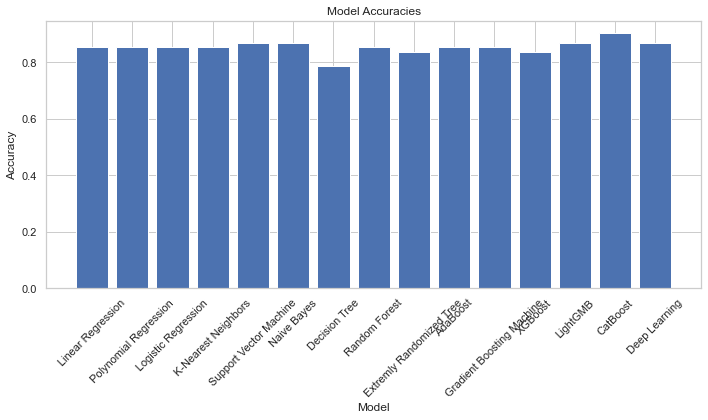

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()